#### importing libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout

In [2]:
 path='data/training_data'

#### reading images using cv2

In [3]:
images=[]
labels=[]

listofdir=os.listdir(path)
for i in listofdir:
    dir=os.path.join(path,i)
    listofimg=os.listdir(dir)
    for j in listofimg:
        file=os.path.join(dir,j)
        img=cv2.imread(file)
        img=cv2.resize(img,(64,64))
        img=np.array(img,dtype=np.float32)
        img=img/255
        images.append(img)
        labels.append(i)
    

#### displaying readed image

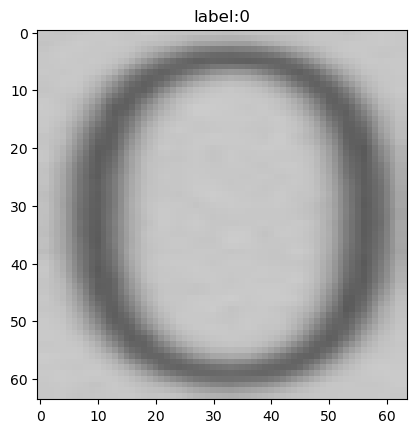

In [4]:
plt.imshow(images[450])
plt.title(f"label:{labels[450]}")
plt.show()

#### converting it to numpy array inorder to make it as input for cnn model

In [5]:
x=np.array(images)
y=np.array(labels)

In [6]:
x.shape

(20628, 64, 64, 3)

In [7]:
y.shape

(20628,)

#### encoding the labels to give unique label for characters 

In [8]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [9]:
len(set(y))

36

In [10]:
shuffled_x,shuffled_y=shuffle(x,y,random_state=42)

#### after shuffling pass it to cnn model

In [13]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=36, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### training the model

In [15]:
history = model.fit(shuffled_x, shuffled_y ,validation_split=0.2, batch_size=16, epochs=10)

Epoch 1/10
1032/1032 [==============================] - 39s 35ms/step - loss: 1.1130 - accuracy: 0.6828 - val_loss: 0.2573 - val_accuracy: 0.9239
Epoch 2/10
1032/1032 [==============================] - 43s 41ms/step - loss: 0.3038 - accuracy: 0.9089 - val_loss: 0.2190 - val_accuracy: 0.9292
Epoch 3/10
1032/1032 [==============================] - 41s 39ms/step - loss: 0.2168 - accuracy: 0.9299 - val_loss: 0.1813 - val_accuracy: 0.9411
Epoch 4/10
1032/1032 [==============================] - 40s 39ms/step - loss: 0.1816 - accuracy: 0.9412 - val_loss: 0.1680 - val_accuracy: 0.9440
Epoch 5/10
1032/1032 [==============================] - 41s 39ms/step - loss: 0.1469 - accuracy: 0.9493 - val_loss: 0.1629 - val_accuracy: 0.9544
Epoch 6/10
1032/1032 [==============================] - 41s 39ms/step - loss: 0.1412 - accuracy: 0.9529 - val_loss: 0.1541 - val_accuracy: 0.9520
Epoch 7/10
1032/1032 [==============================] - 40s 39ms/step - loss: 0.1142 - accuracy: 0.9593 - val_loss: 0.1812 -

#### ploting the loss and val_loss 

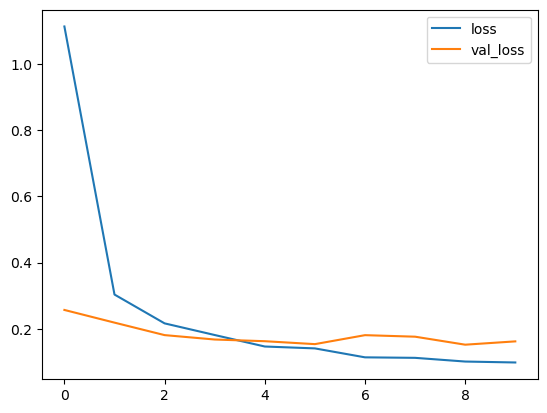

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

#### reading the test dataset and converting to np array for model prediction

In [17]:
test_images=[]
test_labels=[]

path='data/testing_data'

listofdir=os.listdir(path)
for i in listofdir:
    dir=os.path.join(path,i)
    listofimg=os.listdir(dir)
    for j in listofimg:
        file=os.path.join(dir,j)
        img=cv2.imread(file)
        img=cv2.resize(img,(64,64))
        img=np.array(img,dtype=np.float32)
        img=img/255
        test_images.append(img)
        test_labels.append(i)
    

In [18]:
x_test=np.array(test_images)
y_test=np.array(test_labels)

In [19]:
y_test=encoder.fit_transform(y_test)

In [20]:
x_test.shape

(1008, 64, 64, 3)

#### predicting the value of the test dataset

In [21]:
predicted_val=model.predict(x_test)

32/32 [==============================] - 1s 17ms/step


In [22]:
predicted_val.shape

(1008, 36)

In [23]:
predicted_labels = encoder.inverse_transform(np.argmax(predicted_val, axis=1))

#### displaying the predicted character

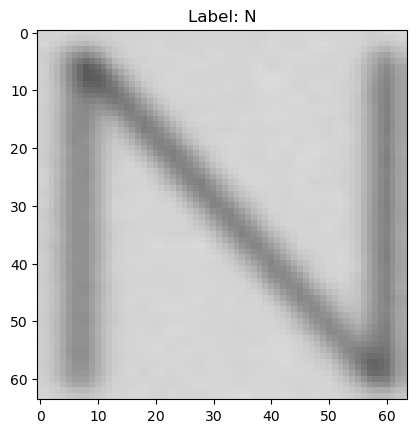

In [24]:
plt.imshow(x_test[650])
plt.title(f"Label: {predicted_labels[650]}")
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 1s 19ms/step - loss: 0.0323 - accuracy: 0.9891
Test Accuracy: 0.9890872836112976
